In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import sys
import numpy as np
plt.rcParams.update({'font.size':12})

In [2]:
file = pd.read_csv('ngts11btess.dat', sep='\s+', header=0)
file = file.drop(0, axis=0)

print(file)

          TESS_time  TESS_flux  TESS_fluxerr
1      2.458386e+06   1.000067      0.000644
2      2.458386e+06   0.999310      0.000644
3      2.458386e+06   0.999665      0.000644
4      2.458386e+06   0.999764      0.000644
5      2.458386e+06   0.999652      0.000644
...             ...        ...           ...
16621  2.459142e+06   1.001667      0.002740
16622  2.459142e+06   1.005528      0.002743
16623  2.459142e+06   1.003051      0.002743
16624  2.459142e+06   1.002275      0.002742
16625  2.459142e+06   1.006743      0.002745

[16625 rows x 3 columns]


In [3]:
tess_bjds = np.array(file.TESS_time)

pdcsap_fluxes = np.array(file.TESS_flux)

pdcsap_fluxes_error = np.array(file.TESS_fluxerr)

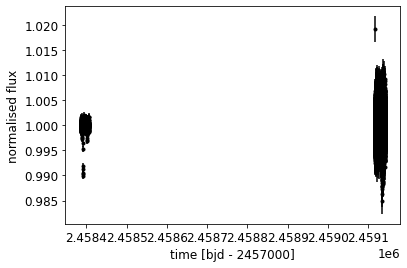

In [4]:
plt.figure()
plt.errorbar(tess_bjds, pdcsap_fluxes, yerr=pdcsap_fluxes_error, fmt=".k")
plt.xlabel("time [bjd - 2457000]")
plt.ylabel("normalised flux")
plt.show()

In [5]:
ticid = "ngts_11b"
period = 12.7645811
epoch = 2459130.15008
pcut = 0.1

bjd: [4915385.99532714 4915386.01616091 4915386.03699468 ... 4916141.57974529
 4916141.58113415 4916141.58252302]
flux: [2.00006696 1.99930951 1.99966486 ... 2.00305096 2.0022751  2.00674299]
flux with nans removed: [2.00006696 1.99930951 1.99966486 ... 2.00305096 2.0022751  2.00674299]
normalisation factor: 1.9999793283880236
normalised flux: [1.00004382 0.99966509 0.99984276 ... 1.00153583 1.0011479  1.00338187]
flux error: [0.00064422 0.0006437  0.00064406 ... 0.00274307 0.00274202 0.00274484]
fractional uncertainty: [0.0003221  0.00032196 0.00032208 ... 0.00136944 0.00136945 0.00136781]
cut normalised fluxes (empty array): []
first 10 of normalised fluxes: [0.9999938014127472, 0.999996966818593, 1.000886065990221, 0.9997112266174318, 0.9999863587291905, 0.9998571789656217, 0.999843678568884, 0.9999459823445681, 0.9998874222090625, 0.999982689435287]


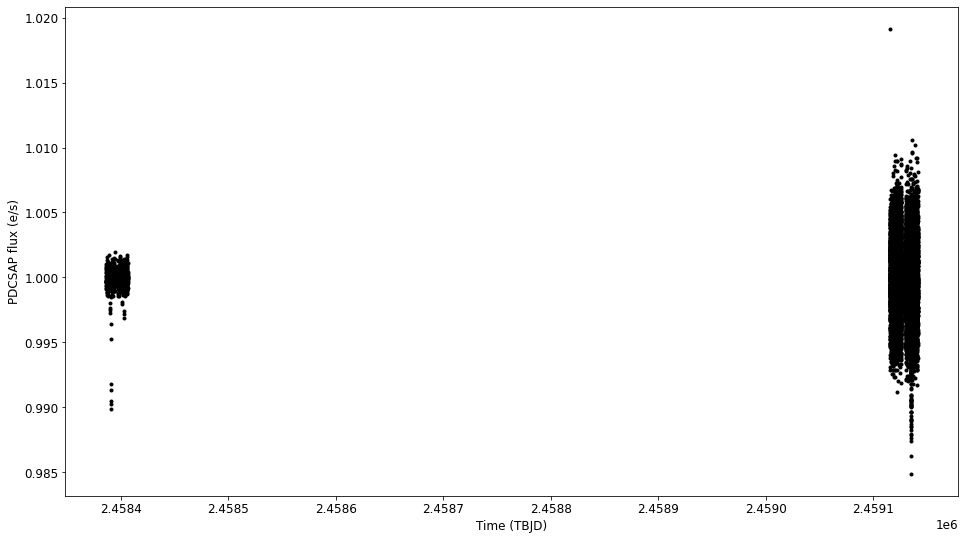

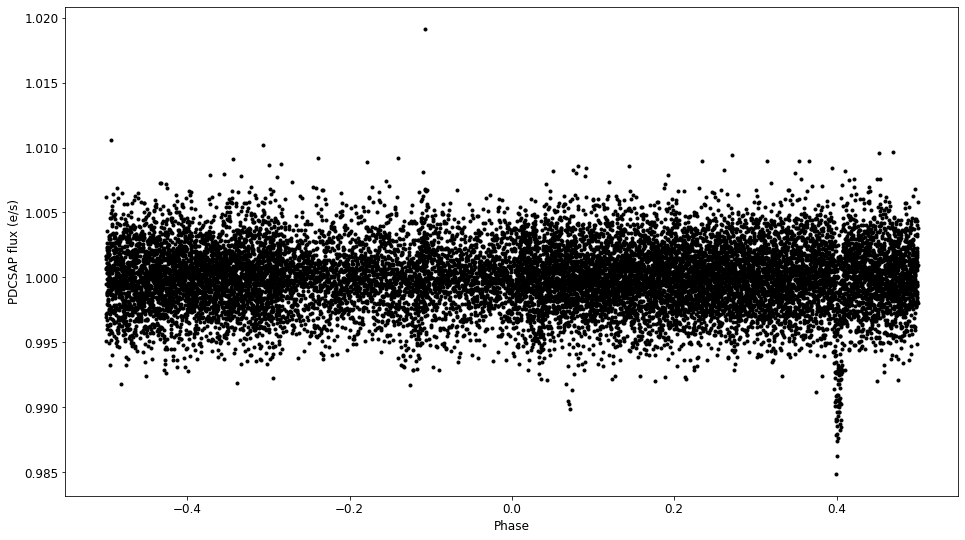

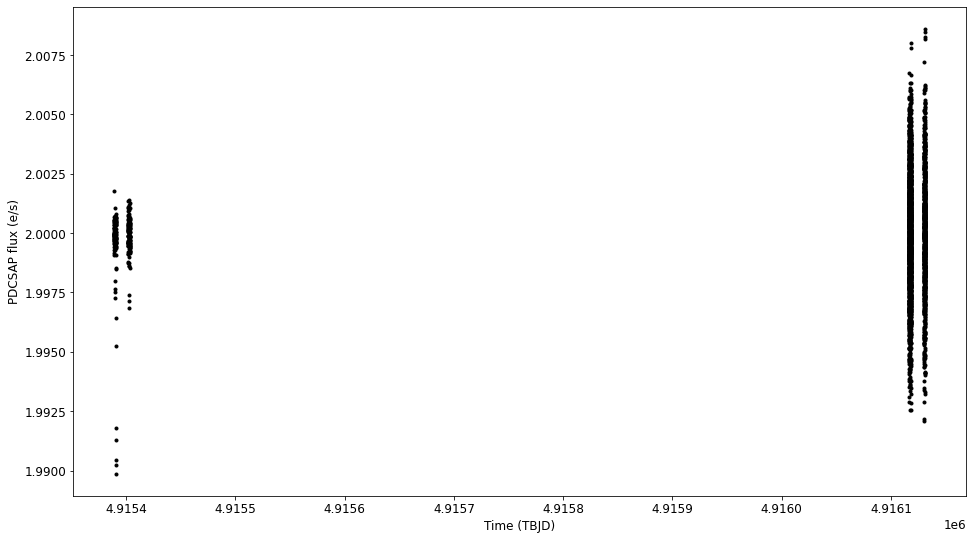

In [ ]:
phase = (((tess_bjds-(epoch + (0.5*period))) % period)/period)- 0.5
        
bjd = np.array(tess_bjds) + 2457000.0
print("bjd:", bjd)
        
#-------------------------#
        
flux = np.array(pdcsap_fluxes) + 1
print("flux:", flux)
fluxnanremoved = flux[np.logical_not(np.isnan(flux))]
print("flux with nans removed:", fluxnanremoved)
        
#-------------------------#
        
norm_factor = np.median(fluxnanremoved)
print("normalisation factor:", norm_factor)
        
norm_flux = flux/norm_factor
print("normalised flux:", norm_flux)
        
#-------------------------#
        
flux_error = np.array(pdcsap_fluxes_error)
print("flux error:", flux_error)
        
fractional_uncertainty = np.divide(flux_error, flux)
print("fractional uncertainty:", fractional_uncertainty)
        
#norm_flux_error = hdulist[1].data['PDCSAP_FLUX_ERR']/norm_factor
#print("normalised flux error:", norm_flux_error)
                                   
#-------------------------#
        
bjd_cut = []
flux_cut = []
err_cut = []
        
norm_flux_cut = []
print("cut normalised fluxes (empty array):", norm_flux_cut)
        
for i in range(0, len(tess_bjds)):
    if -pcut <= phase[i] <= pcut:
        bjd_cut.append(bjd[i])
        flux_cut.append(flux[i])
        err_cut.append(fractional_uncertainty[i])
        norm_flux_cut.append(norm_flux[i])
                
print("first 10 of normalised fluxes:", norm_flux_cut[:10])


fig,ax = plt.subplots()
ax.plot(tess_bjds, pdcsap_fluxes, 'k.')
ax.set_ylabel("PDCSAP flux (e/s)")
ax.set_xlabel("Time (TBJD)")
fig.set_size_inches(16,9)
plt.show()
        
fig,ax = plt.subplots()
ax.plot(phase, pdcsap_fluxes, 'k.')
ax.set_ylabel("PDCSAP flux (e/s)")
ax.set_xlabel("Phase")
fig.set_size_inches(16,9)
plt.show()
        
fig,ax = plt.subplots()
ax.plot(bjd_cut, flux_cut, 'k.')
ax.set_ylabel("PDCSAP flux (e/s)")
ax.set_xlabel("Time (TBJD)")
fig.set_size_inches(16,9)
plt.show()
        
sys.stdout = open("{}_0.1.txt" .format(ticid), "w" )
print("|             BJD | Normalised_Flux | Normalised_Flux_Uncertainty | Accepted |\n|          double |          double |                      double |      int |\n|            days |                 |                             |          |")
for i in range(0, len(bjd_cut)):
    print(bjd_cut[i], '\t', flux_cut[i], '\t', err_cut[i], '\t', '1')

sys.stdout.close()